# Regresión Logística
_Andrés G. López A. Análisis de Datos 202016908 Grupo 64_

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd

# Cargar los datos desde un archivo CSV
data = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
# Vista previa de los primeros registros del DataFrame
print(data.head())

# Información general sobre el DataFrame
print(data.info())

# Resumen estadístico de las variables numéricas
print(data.describe())

# Verificar valores nulos en el DataFrame
print(data.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

In [4]:
# Valores faltantes si los hay
data.dropna(inplace=True)

# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop('condition', axis=1)
y = data['condition']

In [5]:
# Importar la función train_test_split para dividir los datos
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Importar el modelo de regresión logística
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

/home/andruvv/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# Importar las métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo:', accuracy)

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print('Matriz de confusión:')
print(conf_matrix)

# Mostrar el informe de clasificación
class_report = classification_report(y_test, predictions)
print('Informe de clasificación:')
print(class_report)

Precisión del modelo: 0.7333333333333333
Matriz de confusión:
[[23  9]
 [ 7 21]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [8]:
# Visualizar los coeficientes del modelo (si es relevante)
print('Coeficientes del modelo:')
print(model.coef_)

Coeficientes del modelo:
[[-0.02952996  1.26322383  0.26593318  0.02613843  0.00452399 -0.48812226
   0.19110758 -0.04486984  0.54444049  0.49348999  0.20211236  1.22924143
   0.85677079]]


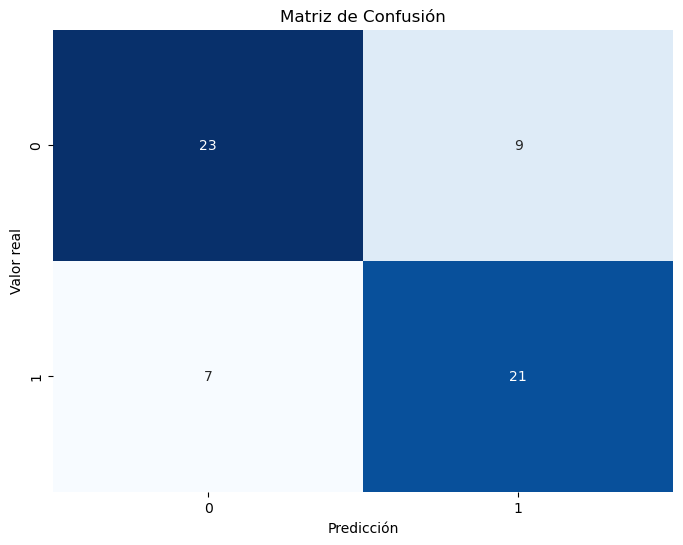

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

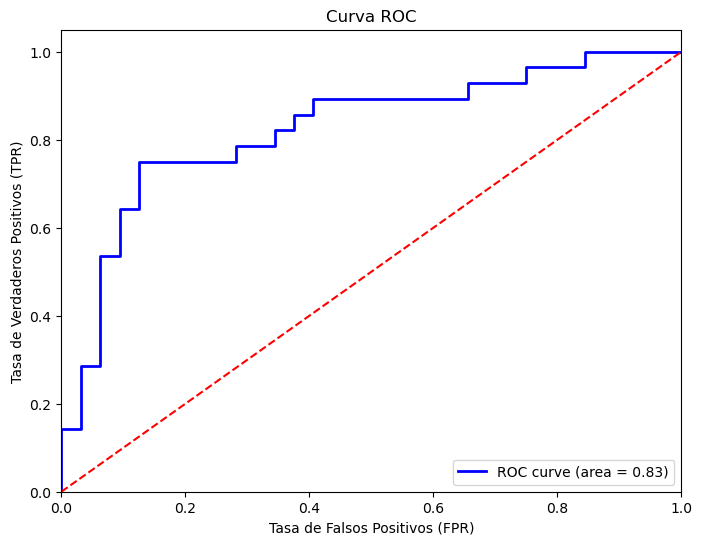

In [10]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de las clases
y_probs = model.predict_proba(X_test)
y_probs = y_probs[:, 1]  # Probabilidades de la clase positiva

# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

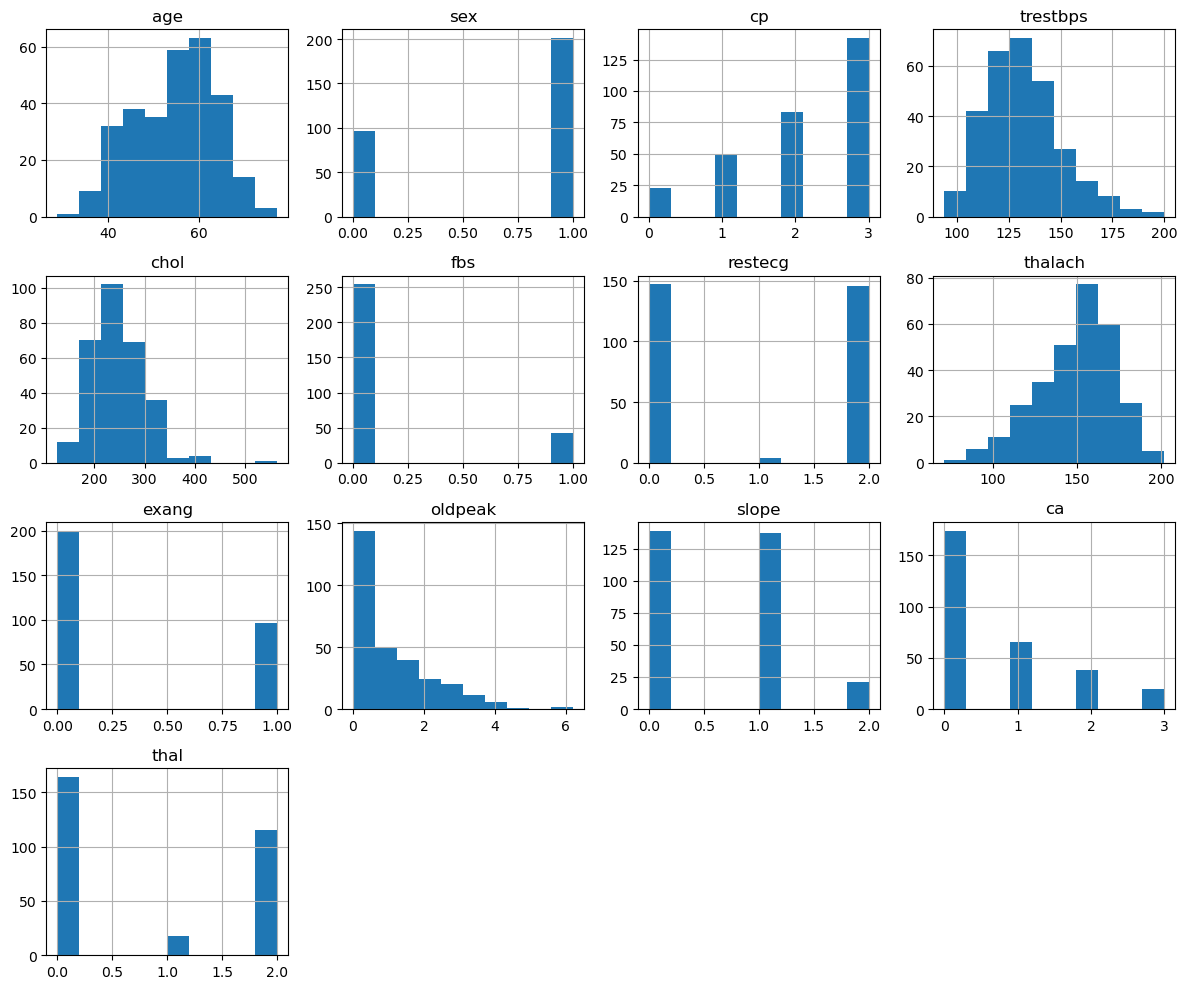

In [11]:
import matplotlib.pyplot as plt

# Excluir la columna 'Dato' y trazar histogramas para todas las características restantes
data.drop(['condition'], axis=1).hist(figsize=(12, 10))
plt.tight_layout()  # Ajustar el diseño de las subgráficas para que no se superpongan
plt.show()